# Hardware Spec



In [1]:
!nvidia-smi

Fri May 12 17:31:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!lscpu

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   46 bits physical, 48 bits virtual
CPU(s):                          2
On-line CPU(s) list:             0,1
Thread(s) per core:              2
Core(s) per socket:              1
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           79
Model name:                      Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:                        0
CPU MHz:                         2199.998
BogoMIPS:                        4399.99
Hypervisor vendor:               KVM
Virtualization type:             full
L1d cache:                       32 KiB
L1i cache:                       32 KiB
L2 cache:                        256 KiB
L3 cache:                        55 MiB
NUMA node0 CPU(s):               0,1
Vulnerability 

# connect to google drive 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [ ]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

import re
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import xgboost as xgb

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# load and merge data in one dataframe

In [ ]:
data_1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Big Data/Arabic_offensive_1.csv",names=['Comment', 'Target'], header=None)
data_2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Big Data/Arabic_offensive_2.csv",names=['Comment', 'Target'], header=None)
data_3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Big Data/Arabic_offensive_3.csv",names=['Comment', 'Target'], header=None)

In [ ]:
print(len(data_1))
print(len(data_2))
print(len(data_3))

4001
4677
1171


In [ ]:
data_1 = data_1.drop(data_1.index[0])
data_2 = data_2.drop(data_2.index[0])
data_3 = data_3.drop(data_3.index[0])

In [ ]:
# Set the display options to show all columns and the full text
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
data_1.head()

,Comment,Target
1,@User.IDX في فترة الصغر والمراهقة يكون من الصعب تقبل تعليقات الأصدقاء حول شعرك المجعد😔 وهنا يأتي دور الوالدين في ادخال الثقة الى نفسية طفلهما لكن مع تقدم بالسن يصبح الأمر عاديا (اتكلم عن تجربتي شخصية),Non-Offensive
2,"""ردا على معظم الردود .. أحب اوضحلكم ان عمليات زرع الكلى لا تتم الا فى حالات معينه حيث تضمن عدم تكرار الفشل فى الكليه المزروعة وهذا ما يحدث مع الأمراض الوراثية التي لابد من استبعادها قبل بدء اجراءات الزرع فارجو التواصل مع الاطباء قبل تجميع اى مبلغ مالى لعمليه الزرع لضمان وصول المال الى مستحقيه * التواصل تليفونيا غير متاح حاليا ويرجى الذهاب شخصيا لمكان تواجد الطفل *الطفل اسمه محمد سعد النادي موجود ايام الاحد والتلات والخميس في مستشفى الدمرداش """" مستشفيات جامعة عين شمس"""" مبنى مستشفى الاطفال الجديدة وحدة الكلى الصناعي الدور التاني .. بالعباسية القاهرة * اقرب محطة مترو هي محطة مترو الدمرداش بيانات الطفلين الاخ الأكبر أحمد سعد نادي 14سنه والطفل المريض محمد سعد نادي 10سنوات محافظه بني سويف .مركز ببا .قريه سدس عربه المزرعه رقم الموبيل للتواصل 01282932709 وربنا يقدر فاعل الخير """,Non-Offensive
3,@User.IDX يجب ان تذكروا ان لكل سنة ثيم للحفل وهو نوع من الحفلات التنكرية !!,Non-Offensive
4,بتعمل حلقة صغيرة عشان عندي امتحان بكرة ومتضيعليش اليوم الله عليك يا فخر اليوتيوب,Non-Offensive
5,على طاري السطحيه مدري ليه تذكرت فيحان,Non-Offensive


In [ ]:
data_2.head()

,Comment,Target
1,وزير الخارجية اللبناني جبران باسيل قال في سلسلة تغريداته عقب اختتام القمة العربية التنموية الاقتصادية والاجتماعية لمسنا تج…,normal
2,سورية بلد الحضارات تربطها بعلية او بحيوان,normal
3,اخي الحاج اذا شعرت انك محرجا من الانتقادات لتصريح جبران باسيل لا داعي لأن تهاجم المنتقدين,normal
4,ما فيك تعيش بلا ما تكب فتن ليل نهار وبكرة قلهم الموضوع عند السيد,normal
5,هذا البطل الذي قاتل وجاذف بحياته لتحيا انت يا واطي يا عيب الشوم,abusive


In [ ]:
data_3.head()

,Comment,Target
1,وحاج حكي مثاليات وامه ومابعرف شو ،اخر هم عندكم الوطن والامن بس تسجيل مواقف ومصالح روحوا عملو بلد ،عملو…,normal
2,قطر مرادف الارهاب,hate
3,ارمني يوناني يحمل جنسية المانية من مواليد سوريا يعني ابوه كان لاجئ كلب ابن شحاطة بسوريا كاتب على واجهة شركته الخاصة يجب ان ترحل ميركل لك ياحيف على الفول والحمص اللي اكلته بببلدنا يا ابن الصرماية,hate
4,يا حمار قمة يعني زبالة,abusive
5,ما حدا غير يلي خلفتك عاهرة يا منحط يا سافل,abusive


In [ ]:
print(len(data_1.columns))
print(len(data_2.columns))
print(len(data_3.columns))

2
2
2


In [ ]:
full_data =  pd.concat([data_1, data_2, data_3])

In [ ]:
print(f'There are {full_data.shape[0]} rows and {full_data.shape[1]} columns')

There are 9846 rows and 2 columns


In [ ]:
temp = full_data.groupby('Target').count()['Comment'].reset_index().sort_values(by='Comment',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Target,Comment
4,normal,3650
0,Non-Offensive,3325
2,abusive,1728
1,Offensive,675
3,hate,468


In [ ]:
full_data['Target'] = full_data['Target'].replace('Non-Offensive','normal')
full_data['Target'] = full_data['Target'].replace('hate','Offensive')
full_data['Target'] = full_data['Target'].replace('abusive','Offensive')

In [ ]:
temp = full_data.groupby('Target').count()['Comment'].reset_index().sort_values(by='Comment',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Target,Comment
1,normal,6975
0,Offensive,2871


In [ ]:
stopwords = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Big Data/stop_words.csv').values

In [ ]:
print(stopwords)

[['قول']
 ['له']
 ['قال']
 ...
 ['سواء']
 ['وانما']
 ['فاذا']]


In [ ]:
stopwords = np.ndarray.tolist(stopwords)
stopwords = sum(stopwords, [])
print(len(stopwords))

1149


# Data Cleaning

In [ ]:
print(f'There are {full_data.shape[0]} rows and {full_data.shape[1]} columns')

There are 9846 rows and 2 columns


In [ ]:
full_data.isnull().sum()

Comment    0
Target     0
dtype: int64

In [ ]:
full_data['Comment'].duplicated().sum()

92

In [ ]:
full_data.drop_duplicates(inplace=True,keep=False)

In [ ]:
print(f'There are {full_data.shape[0]} rows and {full_data.shape[1]} columns')

There are 9670 rows and 2 columns


In [ ]:
temp = full_data.groupby('Target').count()['Comment'].reset_index().sort_values(by='Comment',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Target,Comment
1,normal,6833
0,Offensive,2837


In [ ]:
full_data

,Comment,Target
1,@User.IDX في فترة الصغر والمراهقة يكون من الصعب تقبل تعليقات الأصدقاء حول شعرك المجعد😔 وهنا يأتي دور الوالدين في ادخال الثقة الى نفسية طفلهما لكن مع تقدم بالسن يصبح الأمر عاديا (اتكلم عن تجربتي شخصية),normal
2,"""ردا على معظم الردود .. أحب اوضحلكم ان عمليات زرع الكلى لا تتم الا فى حالات معينه حيث تضمن عدم تكرار الفشل فى الكليه المزروعة وهذا ما يحدث مع الأمراض الوراثية التي لابد من استبعادها قبل بدء اجراءات الزرع فارجو التواصل مع الاطباء قبل تجميع اى مبلغ مالى لعمليه الزرع لضمان وصول المال الى مستحقيه * التواصل تليفونيا غير متاح حاليا ويرجى الذهاب شخصيا لمكان تواجد الطفل *الطفل اسمه محمد سعد النادي موجود ايام الاحد والتلات والخميس في مستشفى الدمرداش """" مستشفيات جامعة عين شمس"""" مبنى مستشفى الاطفال الجديدة وحدة الكلى الصناعي الدور التاني .. بالعباسية القاهرة * اقرب محطة مترو هي محطة مترو الدمرداش بيانات الطفلين الاخ الأكبر أحمد سعد نادي 14سنه والطفل المريض محمد سعد نادي 10سنوات محافظه بني سويف .مركز ببا .قريه سدس عربه المزرعه رقم الموبيل للتواصل 01282932709 وربنا يقدر فاعل الخير """,normal
3,@User.IDX يجب ان تذكروا ان لكل سنة ثيم للحفل وهو نوع من الحفلات التنكرية !!,normal
4,بتعمل حلقة صغيرة عشان عندي امتحان بكرة ومتضيعليش اليوم الله عليك يا فخر اليوتيوب,normal
5,على طاري السطحيه مدري ليه تذكرت فيحان,normal
...,...,...
1166,ههههههه على فكرة بس اقرأي رد وليد بيك منيح حاجة تتحمرني,Offensive
1167,طول ما جبران باسيل ورا ما بظن كم شهر عطل الحكومة ب ليتوزر,normal
1168,يلعن روحه من الجد للولد هات طناجر العرعور والحقني,Offensive
1169,هاي يا غلن؟إي إنت أول شي ضحكة بقرة معلوفة بمعمل مرتدلة تاني شي يا شريف مكة إنت مع إنو مكة أشرف منك جماعتك شو قدموا,Offensive


In [ ]:
def clean_arabic_text(text):
    # Remove non-Arabic characters
    cleaned_text = re.sub(r"[^\u0600-\u06FF\s]+", "", text)
    
    # Remove extra white spaces
    cleaned_text = re.sub(r"\s+", " ", cleaned_text)
    
    # Remove diacritical marks 
    cleaned_text = re.sub(r"\u064B|\u064C|\u064D|\u064E|\u064F|\u0650|\u0651|\u0652|\u0653|\u0654", "", cleaned_text)
    
    # Remove tatweel character (optional)
    cleaned_text = cleaned_text.replace("\u0640", "")
    
    # Normalize the text
    cleaned_text = cleaned_text.strip().lower()
    
    # Additional cleaning steps
    new_line = '\n+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    non_word_char = '[^\w]'
    underscore = '_[\w]+'
    
    cleaned_text = re.sub(new_line, ' ', cleaned_text)
    cleaned_text = re.sub(giant_url_regex, '', cleaned_text)
    cleaned_text = re.sub(mention_regex, '', cleaned_text)
    cleaned_text = re.sub(non_word_char, ' ', cleaned_text)
    cleaned_text = re.sub(r"\bو(.*?)\b", r'\1', cleaned_text)
    cleaned_text = re.sub('([0-9]+)', '', cleaned_text)
    cleaned_text = re.sub(underscore, ' ', cleaned_text)
    
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    cleaned_text = regrex_pattern.sub(r'', cleaned_text)
    cleaned_text = re.sub(r'(@\w+\.\w+)', r'\1', cleaned_text)  # Preserve @User.IDX pattern
    return cleaned_text

In [ ]:
# Example 
Example_df = pd.DataFrame({'text': ["هذا نص عربي 123 ABC !@#", "مرحبا بك في العالم"]})
Example_df['cleaned_text'] = Example_df['text'].apply(clean_arabic_text)

# Remove stopwords
Example_df['cleaned_text'] = Example_df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

print(Example_df['cleaned_text'])

0         نص عربي
1    مرحبا العالم
Name: cleaned_text, dtype: object


In [ ]:
# clean Arabic text
full_data['clean_Comment'] = full_data['Comment'].apply(clean_arabic_text)

# Remove stopwords
full_data['clean_Comment'] = full_data['clean_Comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

In [ ]:
full_data

,Comment,Target,clean_Comment
1,@User.IDX في فترة الصغر والمراهقة يكون من الصعب تقبل تعليقات الأصدقاء حول شعرك المجعد😔 وهنا يأتي دور الوالدين في ادخال الثقة الى نفسية طفلهما لكن مع تقدم بالسن يصبح الأمر عاديا (اتكلم عن تجربتي شخصية),normal,فترة الصغر المراهقة الصعب تقبل تعليقات الأصدقاء شعرك المجعد يأتي دور الوالدين ادخال الثقة نفسية طفلهما تقدم بالسن يصبح الأمر عاديا اتكلم تجربتي شخصية
2,"""ردا على معظم الردود .. أحب اوضحلكم ان عمليات زرع الكلى لا تتم الا فى حالات معينه حيث تضمن عدم تكرار الفشل فى الكليه المزروعة وهذا ما يحدث مع الأمراض الوراثية التي لابد من استبعادها قبل بدء اجراءات الزرع فارجو التواصل مع الاطباء قبل تجميع اى مبلغ مالى لعمليه الزرع لضمان وصول المال الى مستحقيه * التواصل تليفونيا غير متاح حاليا ويرجى الذهاب شخصيا لمكان تواجد الطفل *الطفل اسمه محمد سعد النادي موجود ايام الاحد والتلات والخميس في مستشفى الدمرداش """" مستشفيات جامعة عين شمس"""" مبنى مستشفى الاطفال الجديدة وحدة الكلى الصناعي الدور التاني .. بالعباسية القاهرة * اقرب محطة مترو هي محطة مترو الدمرداش بيانات الطفلين الاخ الأكبر أحمد سعد نادي 14سنه والطفل المريض محمد سعد نادي 10سنوات محافظه بني سويف .مركز ببا .قريه سدس عربه المزرعه رقم الموبيل للتواصل 01282932709 وربنا يقدر فاعل الخير """,normal,ردا معظم الردود أحب اوضحلكم عمليات زرع الكلى تتم حالات معينه تضمن تكرار الفشل الكليه المزروعة يحدث الأمراض الوراثية لابد استبعادها بدء اجراءات الزرع فارجو التواصل الاطباء تجميع اى مبلغ مالى لعمليه الزرع لضمان صول المال مستحقيه التواصل تليفونيا متاح يرجى الذهاب شخصيا لمكان تواجد الطفل الطفل اسمه محمد سعد النادي موجود الاحد التلات الخميس مستشفى الدمرداش مستشفيات جامعة شمس مبنى مستشفى الاطفال الجديدة حدة الكلى الصناعي الدور التاني بالعباسية القاهرة اقرب محطة مترو محطة مترو الدمرداش بيانات الطفلين الاخ الأكبر أحمد سعد نادي سنه الطفل المريض محمد سعد نادي محافظه بني سويف مركز ببا قريه سدس عربه المزرعه رقم الموبيل للتواصل ربنا يقدر فاعل الخير
3,@User.IDX يجب ان تذكروا ان لكل سنة ثيم للحفل وهو نوع من الحفلات التنكرية !!,normal,يجب تذكروا لكل ثيم للحفل نوع الحفلات التنكرية
4,بتعمل حلقة صغيرة عشان عندي امتحان بكرة ومتضيعليش اليوم الله عليك يا فخر اليوتيوب,normal,بتعمل حلقة صغيرة امتحان بكرة متضيعليش الله فخر اليوتيوب
5,على طاري السطحيه مدري ليه تذكرت فيحان,normal,طاري السطحيه مدري تذكرت فيحان
...,...,...,...
1166,ههههههه على فكرة بس اقرأي رد وليد بيك منيح حاجة تتحمرني,Offensive,ههههههه فكرة اقرأي رد ليد بيك منيح حاجة تتحمرني
1167,طول ما جبران باسيل ورا ما بظن كم شهر عطل الحكومة ب ليتوزر,normal,طول جبران باسيل را بظن شهر عطل الحكومة ليتوزر
1168,يلعن روحه من الجد للولد هات طناجر العرعور والحقني,Offensive,يلعن روحه الجد للولد هات طناجر العرعور الحقني
1169,هاي يا غلن؟إي إنت أول شي ضحكة بقرة معلوفة بمعمل مرتدلة تاني شي يا شريف مكة إنت مع إنو مكة أشرف منك جماعتك شو قدموا,Offensive,هاي غلن إي إنت ضحكة بقرة معلوفة بمعمل مرتدلة تاني شريف مكة إنت إنو مكة أشرف منك جماعتك قدموا


# Data Visualization

In [ ]:
df_normal = full_data[full_data['Target'] == 'normal']
df_Offensive = full_data[full_data['Target'] == 'Offensive']

In [ ]:
all_most_frequent_world = Counter(" ".join(full_data["clean_Comment"]).split()).most_common(50)
all_most_frequent_world

[('الله', 1563),
 ('جبران', 962),
 ('باسيل', 954),
 ('قطر', 320),
 ('لبنان', 292),
 ('العرب', 216),
 ('هوا', 216),
 ('هاب', 207),
 ('الناس', 203),
 ('سوريا', 203),
 ('كول', 193),
 ('كنت', 191),
 ('عمر', 181),
 ('كلب', 174),
 ('الوزير', 167),
 ('العالم', 164),
 ('العربية', 161),
 ('الشعب', 157),
 ('دولة', 157),
 ('متل', 146),
 ('لازم', 144),
 ('ئام', 138),
 ('روح', 136),
 ('اللهم', 134),
 ('السعودية', 129),
 ('الرئيس', 129),
 ('زير', 128),
 ('شكرا', 127),
 ('ابو', 127),
 ('المسلمين', 120),
 ('مصر', 117),
 ('ابن', 117),
 ('هيدا', 115),
 ('طيب', 111),
 ('الدول', 109),
 ('إلا', 109),
 ('حق', 107),
 ('منك', 104),
 ('العربي', 102),
 ('بشار', 101),
 ('البلد', 101),
 ('شعب', 101),
 ('قناة', 100),
 ('كتير', 100),
 ('رئيس', 99),
 ('كلام', 98),
 ('اسرائيل', 97),
 ('الدين', 95),
 ('عثمان', 94),
 ('محمد', 92)]

In [ ]:
normal_most_frequent_world = Counter(" ".join(df_normal["clean_Comment"]).split()).most_common(50)
normal_most_frequent_world

[('الله', 1195),
 ('جبران', 835),
 ('باسيل', 829),
 ('لبنان', 218),
 ('قطر', 213),
 ('عمر', 169),
 ('الوزير', 157),
 ('الناس', 155),
 ('كنت', 154),
 ('سوريا', 154),
 ('العرب', 147),
 ('هاب', 138),
 ('العربية', 136),
 ('دولة', 125),
 ('اللهم', 116),
 ('شكرا', 116),
 ('الشعب', 113),
 ('زير', 112),
 ('الرئيس', 111),
 ('العالم', 110),
 ('لازم', 99),
 ('حق', 96),
 ('السعودية', 93),
 ('الدول', 92),
 ('ئام', 92),
 ('المسلمين', 89),
 ('الفيديو', 85),
 ('العربي', 85),
 ('متل', 83),
 ('إلا', 81),
 ('كلام', 81),
 ('عون', 81),
 ('كتير', 80),
 ('رئيس', 80),
 ('طيب', 78),
 ('الدين', 78),
 ('البلد', 78),
 ('مصر', 77),
 ('بالله', 76),
 ('اسرائيل', 76),
 ('الحق', 75),
 ('محمد', 74),
 ('الدولة', 72),
 ('شعب', 72),
 ('القمة', 72),
 ('دول', 71),
 ('يجب', 70),
 ('مرة', 70),
 ('لايك', 70),
 ('خير', 69)]

In [ ]:
Offensive_most_frequent_world = Counter(" ".join(df_Offensive["clean_Comment"]).split()).most_common(50)
Offensive_most_frequent_world

[('الله', 368),
 ('هوا', 198),
 ('كول', 189),
 ('كلب', 169),
 ('جبران', 127),
 ('باسيل', 125),
 ('قطر', 107),
 ('ابن', 86),
 ('روح', 84),
 ('يلعن', 82),
 ('حمار', 80),
 ('لبنان', 74),
 ('كلاب', 69),
 ('العرب', 69),
 ('هاب', 69),
 ('بشار', 67),
 ('خراس', 66),
 ('ابو', 65),
 ('متل', 63),
 ('قناة', 59),
 ('العالم', 54),
 ('منك', 54),
 ('هيدا', 53),
 ('اطي', 51),
 ('سوريا', 49),
 ('خرا', 49),
 ('الكلب', 48),
 ('الناس', 48),
 ('شرف', 46),
 ('ئام', 46),
 ('لازم', 45),
 ('الشعب', 44),
 ('صرماية', 44),
 ('راسك', 42),
 ('الجزيرة', 40),
 ('مصر', 40),
 ('حقير', 40),
 ('فيك', 39),
 ('ايران', 39),
 ('طز', 39),
 ('حزب', 38),
 ('حالك', 38),
 ('سد', 38),
 ('كنت', 37),
 ('السعودية', 36),
 ('عميل', 35),
 ('قاتل', 35),
 ('طيب', 33),
 ('اكبر', 33),
 ('دولة', 32)]

In [ ]:
# to list of world
all_most_frequent_world = [list(ele)[0] for ele in all_most_frequent_world]
Offensive_most_frequent_world = [list(ele)[0] for ele in Offensive_most_frequent_world]
normal_most_frequent_world = [list(ele)[0] for ele in normal_most_frequent_world]

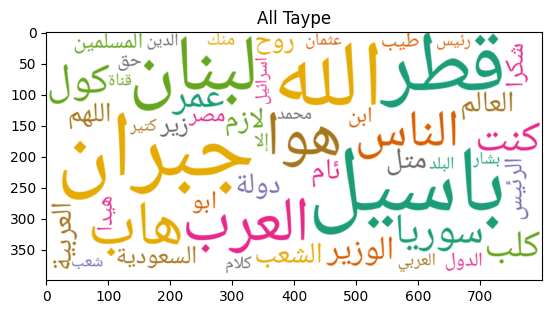

In [ ]:
wordcloud = WordCloud(font_path='/content/drive/MyDrive/Colab Notebooks/Big Data/NotoNaskhArabic-Regular.ttf',background_color='white',colormap='Dark2', max_font_size=150, random_state=42,width=800, height=400).generate(" ".join(all_most_frequent_world))
plt.title("All Taype")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

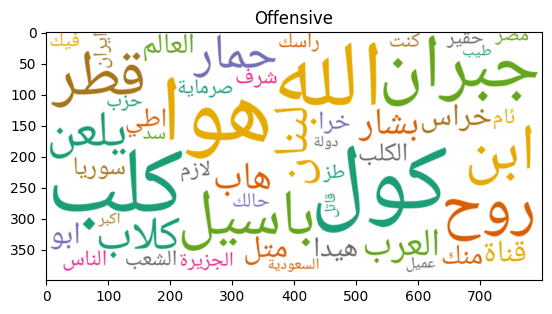

In [ ]:
wordcloud = WordCloud(font_path='/content/drive/MyDrive/Colab Notebooks/Big Data/NotoNaskhArabic-Regular.ttf',background_color='white',colormap='Dark2', max_font_size=150, random_state=42,width=800, height=400).generate(" ".join(Offensive_most_frequent_world))
plt.title("Offensive")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

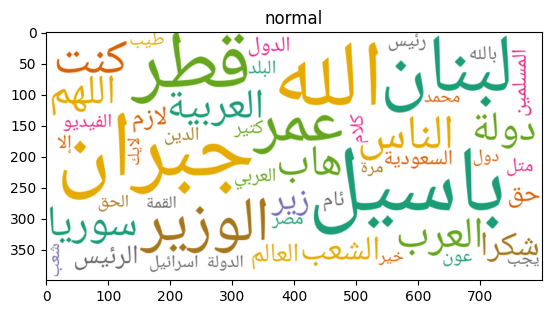

In [ ]:
wordcloud = WordCloud(font_path='/content/drive/MyDrive/Colab Notebooks/Big Data/NotoNaskhArabic-Regular.ttf',background_color='white',colormap='Dark2', max_font_size=150, random_state=42,width=800, height=400).generate(" ".join(normal_most_frequent_world))
plt.title("normal")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

# Feature And Target

In [ ]:
X = full_data['clean_Comment']
y = np.where(full_data['Target'] == 'normal', 0, 1)

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
print('training input :', X_train.shape[0])
print('training output :', y_train.shape[0])
print('testing input :', X_test.shape[0])
print('testing output :', y_test.shape[0])

training input : 6769
training output : 6769
testing input : 2901
testing output : 2901


# Support vector machines Model





In [ ]:
TF_IDF = TfidfVectorizer(analyzer='char_wb',ngram_range=(3,10))
SVM = LinearSVC()
Model_SVM = Pipeline([('tfidf' , TF_IDF) , ('clf', SVM)])
Model_SVM.fit(X_train, y_train)
y_pred_SVC = Model_SVM.predict(X_test)

## Result

In [ ]:
print(classification_report(y_test, y_pred_SVC, target_names=['normal','Offensive']))

              precision    recall  f1-score   support

      normal       0.87      0.95      0.91      2073
   Offensive       0.84      0.63      0.72       828

    accuracy                           0.86      2901
   macro avg       0.85      0.79      0.81      2901
weighted avg       0.86      0.86      0.85      2901



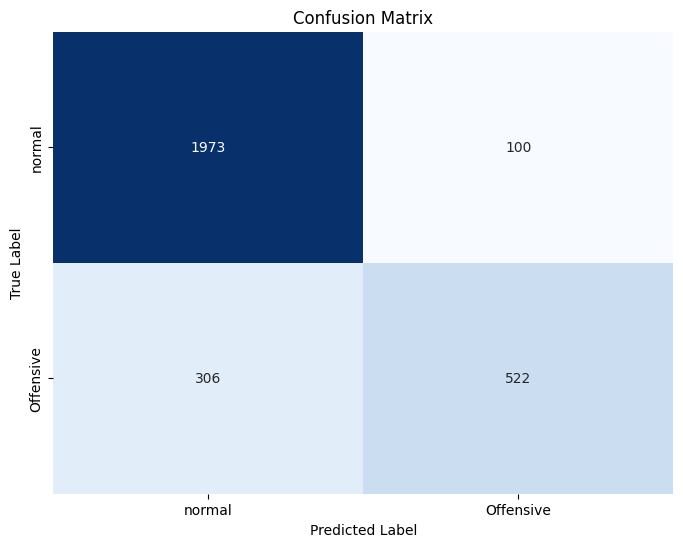

In [ ]:
class_labels = ['normal', 'Offensive']  # Custom class labels

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_SVC)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.xticks([0.5, 1.5], class_labels)  
plt.yticks([0.5, 1.5], class_labels)
plt.show()

## Save model

In [ ]:
import joblib
# Save the model to a file
joblib.dump(Model_SVM, '/content/drive/MyDrive/Colab Notebooks/Big Data/SVM_model.pkl')

['/content/drive/MyDrive/Colab Notebooks/Big Data/SVM_model.pkl']

# xgboost Model

In [ ]:
Model_XGB = Pipeline([('tfidf' , TF_IDF) , ('XGB', xgb.XGBClassifier(objective="multi:softmax", num_class=2, random_state=42)
)])
Model_XGB.fit(X_train, y_train)
y_pred_XGB = Model_XGB.predict(X_test)

## Result

In [ ]:
print(classification_report(y_test, y_pred_XGB, target_names=['normal','Offensive']))

              precision    recall  f1-score   support

      normal       0.85      0.97      0.90      2073
   Offensive       0.87      0.57      0.69       828

    accuracy                           0.85      2901
   macro avg       0.86      0.77      0.80      2901
weighted avg       0.86      0.85      0.84      2901



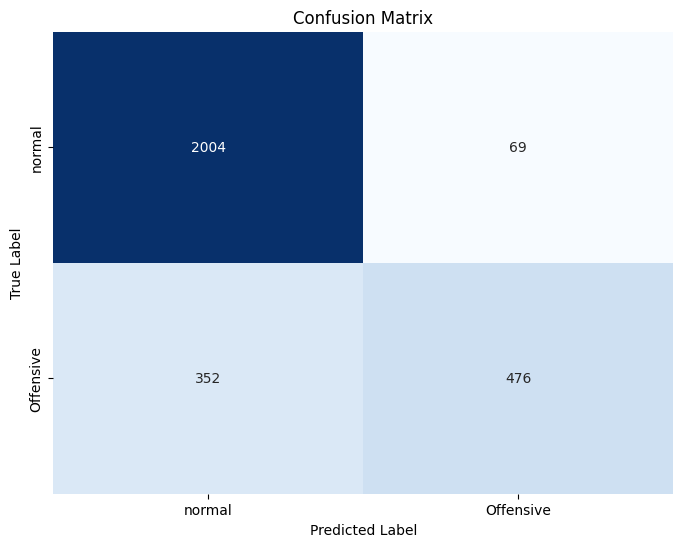

In [ ]:
class_labels = ['normal', 'Offensive']  # Custom class labels

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_XGB)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.xticks([0.5, 1.5], class_labels)  
plt.yticks([0.5, 1.5], class_labels) 
plt.show()